# Hierachical Clustering
---
### Fahrel Gibran Alghany - 24060120130106 - C2

---

14/11/2022

---



## Import library yang dibutuhkan

In [1]:
import numpy as np
import pandas as pd
from scipy import ndimage
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix
from matplotlib import pyplot as plt
from sklearn import manifold, datasets
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
%matplotlib inline

## Tugas 1 - Random Dataset

### Generate Random Dataset

In [2]:
# Generate random datasets
X1, y1 = make_blobs(n_samples=100, centers=[[4, 4], [-2, -1], [1, 1], [10, 4]], cluster_std=0.9)

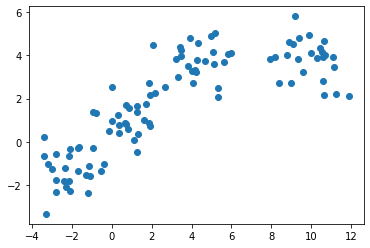

In [3]:
# Plot the scatter plot of the randomly generated data
plt.scatter(X1[:, 0], X1[:, 1], marker='o')
plt.show()

### Agglomerative Clustering

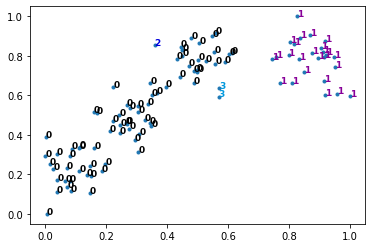

In [4]:
# Agglomerative Clustering Single Linkage
agglom_single = AgglomerativeClustering(n_clusters = 4, linkage = 'single')
agglom_single.fit(X1,y1)

# Plot the scatter plot of the randomly generated data
plt.figure(figsize=(6,4))
x_min, x_max = np.min(X1, axis=0), np.max(X1, axis=0)
X1 = (X1 - x_min) / (x_max - x_min)
for i in range(X1.shape[0]):
    plt.text(X1[i, 0], X1[i, 1], str(agglom_single.labels_[i]),
             color=plt.cm.nipy_spectral(agglom_single.labels_[i] / 10.),
             fontdict={'weight': 'bold', 'size': 9})
plt.scatter(X1[:, 0], X1[:, 1], marker='.')
plt.show()

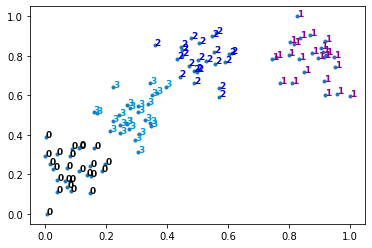

In [5]:
# Agglomerative Clustering Average Linkage
agglom_average = AgglomerativeClustering(n_clusters = 4, linkage = 'average')
agglom_average.fit(X1,y1)

# Plot the scatter plot of the randomly generated data
plt.figure(figsize=(6,4))
x_min, x_max = np.min(X1, axis=0), np.max(X1, axis=0)
X1 = (X1 - x_min) / (x_max - x_min)
for i in range(X1.shape[0]):
    plt.text(X1[i, 0], X1[i, 1], str(agglom_average.labels_[i]),
             color=plt.cm.nipy_spectral(agglom_average.labels_[i] / 10.),
             fontdict={'weight': 'bold', 'size': 9})
plt.scatter(X1[:, 0], X1[:, 1], marker='.')
plt.show()

In [6]:
# Distance Matrix
dist_matrix = distance_matrix(X1,X1)
print(dist_matrix)

[[0.         0.34919402 0.46650403 ... 0.08646768 0.70015172 0.50556274]
 [0.34919402 0.         0.11761108 ... 0.32203382 0.95826474 0.16465956]
 [0.46650403 0.11761108 0.         ... 0.43502359 1.05171231 0.0630751 ]
 ...
 [0.08646768 0.32203382 0.43502359 ... 0.         0.66672605 0.46522717]
 [0.70015172 0.95826474 1.05171231 ... 0.66672605 0.         1.05736155]
 [0.50556274 0.16465956 0.0630751  ... 0.46522717 1.05736155 0.        ]]


In [7]:
# Hierarchical Clustering
single = hierarchy.linkage(dist_matrix, 'single')
average = hierarchy.linkage(dist_matrix, 'average')

C:\Users\FAHREL\AppData\Local\Temp/ipykernel_22516/69170429.py:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  single = hierarchy.linkage(dist_matrix, 'single')
C:\Users\FAHREL\AppData\Local\Temp/ipykernel_22516/69170429.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  average = hierarchy.linkage(dist_matrix, 'average')


### Plot Dendogram

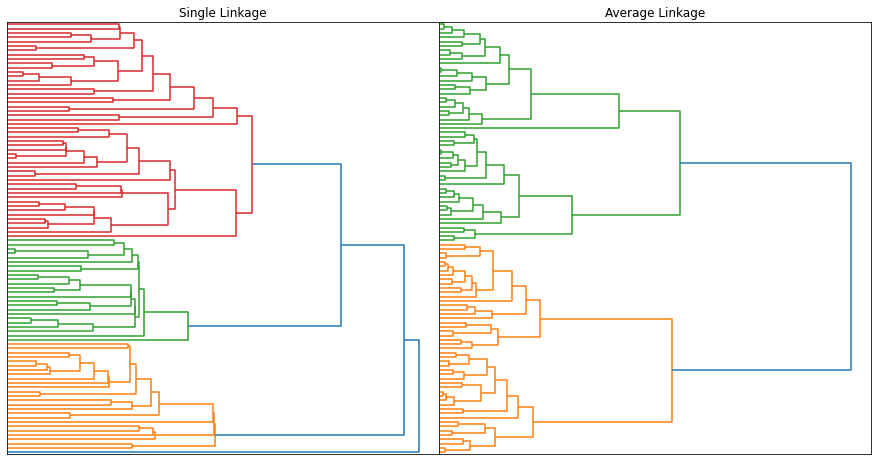

In [8]:
# Plot the dendogram side-by-side
fig = plt.figure(figsize=(15,10))

# Single Linkage
# Give title and show the dendogram
ax1 = fig.add_axes([0.1,0.1,0.4,0.6])
Z1 = hierarchy.dendrogram(single, orientation='right')
ax1.set_xticks([])
ax1.set_yticks([])
plt.title('Single Linkage')

# Average Linkage
# Give title and show the dendogram
ax2 = fig.add_axes([0.5,0.1,0.4,0.6])
Z2 = hierarchy.dendrogram(average, orientation='right')
ax2.set_xticks([])
ax2.set_yticks([])
plt.title('Average Linkage')

plt.show()

### Summary

Ketika menggunakan single linkage, data cenderung terpecah menjadi 2 cluster. Sedangkan ketika menggunakan complete linkage, data terpecah menjadi 4 cluster dengan jumlah tiap cluster yang merata.

## Tugas 2 - Random Dataset

### Understanding the data

In [9]:
# Import dataset
df = pd.read_csv('cars_clus.csv')

In [10]:
# Show head
df.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.36,0,21.5,1.8,140,101.2,67.3,172.4,2.639,13.2,28,2.828,0
1,Acura,TL,39.384,19.875,0,28.4,3.2,225,108.1,70.3,192.9,3.517,17.2,25,3.673,0
2,Acura,CL,14.114,18.225,0,$null$,3.2,225,106.9,70.6,192,3.47,17.2,26,2.647,0
3,Acura,RL,8.588,29.725,0,42,3.5,210,114.6,71.4,196.6,3.85,18,22,2.15,0
4,Audi,A4,20.397,22.255,0,23.99,1.8,150,102.6,68.2,178,2.998,16.4,27,3.015,0


In [11]:
# Show dataset
print("Shape of dataset: ", df.shape)

Shape of dataset:  (159, 16)


### Preprocessing Data

In [12]:
# Data Cleaning, convert to numerical, if can't drop the data
df[['sales','resale','type','price','engine_s','horsepow','wheelbas','width','length','curb_wgt','fuel_cap','mpg','lnsales']] = df[['sales','resale','type','price','engine_s','horsepow','wheelbas','width','length','curb_wgt','fuel_cap','mpg','lnsales']].apply(pd.to_numeric, errors='coerce')
df = df.dropna()
df = df.reset_index(drop=True)
print("Shape of dataset after cleaning: ", df.shape)


Shape of dataset after cleaning:  (117, 16)


In [13]:
df.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0


In [14]:
# Check if there is any missing value
df.isnull().sum()

manufact     0
model        0
sales        0
resale       0
type         0
price        0
engine_s     0
horsepow     0
wheelbas     0
width        0
length       0
curb_wgt     0
fuel_cap     0
mpg          0
lnsales      0
partition    0
dtype: int64

In [15]:
# Feature selection
featureset = df[['engine_s', 'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg']]
featureset.head()

,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg
0,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0
1,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0
2,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0
3,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0
4,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0


In [16]:
from sklearn.preprocessing import MinMaxScaler

# Normalize the dataset
x = featureset.values
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)
feature_mtx[0:5]

array([[0.11428571, 0.21518987, 0.18655098, 0.28143713, 0.30625832,
        0.2310559 , 0.13364055, 0.43333333],
       [0.31428571, 0.43037975, 0.3362256 , 0.46107784, 0.5792277 ,
        0.50372671, 0.31797235, 0.33333333],
       [0.35714286, 0.39240506, 0.47722343, 0.52694611, 0.62849534,
        0.60714286, 0.35483871, 0.23333333],
       [0.11428571, 0.24050633, 0.21691974, 0.33532934, 0.38082557,
        0.34254658, 0.28110599, 0.4       ],
       [0.25714286, 0.36708861, 0.34924078, 0.80838323, 0.56724368,
        0.5173913 , 0.37788018, 0.23333333]])

### Agglomerative Clustering with Scipy

In [17]:
# Agglomerative Clustering with scipy
import scipy
import scipy.cluster.hierarchy

leng = feature_mtx.shape[0]
D = scipy.zeros([leng,leng])
for i in range(leng):
    for j in range(leng):
        D[i,j] = scipy.spatial.distance.euclidean(feature_mtx[i], feature_mtx[j])

# Single Linkage
cars_single = hierarchy.linkage(D, 'single')

# Average Linkage
cars_average = hierarchy.linkage(D, 'average')

C:\Users\FAHREL\AppData\Local\Temp/ipykernel_22516/1606245498.py:6: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  D = scipy.zeros([leng,leng])
C:\Users\FAHREL\AppData\Local\Temp/ipykernel_22516/1606245498.py:12: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  cars_single = hierarchy.linkage(D, 'single')
C:\Users\FAHREL\AppData\Local\Temp/ipykernel_22516/1606245498.py:15: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  cars_average = hierarchy.linkage(D, 'average')


In [18]:
# Fcluster
from scipy.cluster.hierarchy import fcluster
max_d = 3
clusters = fcluster(cars_single, max_d, criterion='distance')
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [19]:
clusters = fcluster(cars_average, max_d, criterion='distance')
clusters

array([3, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 4, 4, 5, 5, 5, 5, 5, 5, 4, 3,
       6, 5, 5, 5, 5, 5, 3, 5, 5, 2, 1, 1, 1, 4, 5, 3, 5, 5, 5, 4, 5, 4,
       1, 5, 1, 3, 5, 5, 5, 4, 3, 3, 5, 5, 3, 5, 5, 5, 5, 4, 4, 4, 3, 5,
       5, 5, 5, 4, 5, 5, 5, 5, 4, 5, 5, 5, 5, 4, 4, 3, 5, 5, 5, 5, 5, 4,
       5, 4, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 3, 3, 3, 5, 5, 3, 5, 3,
       5, 1, 3, 5, 5, 3, 3], dtype=int32)

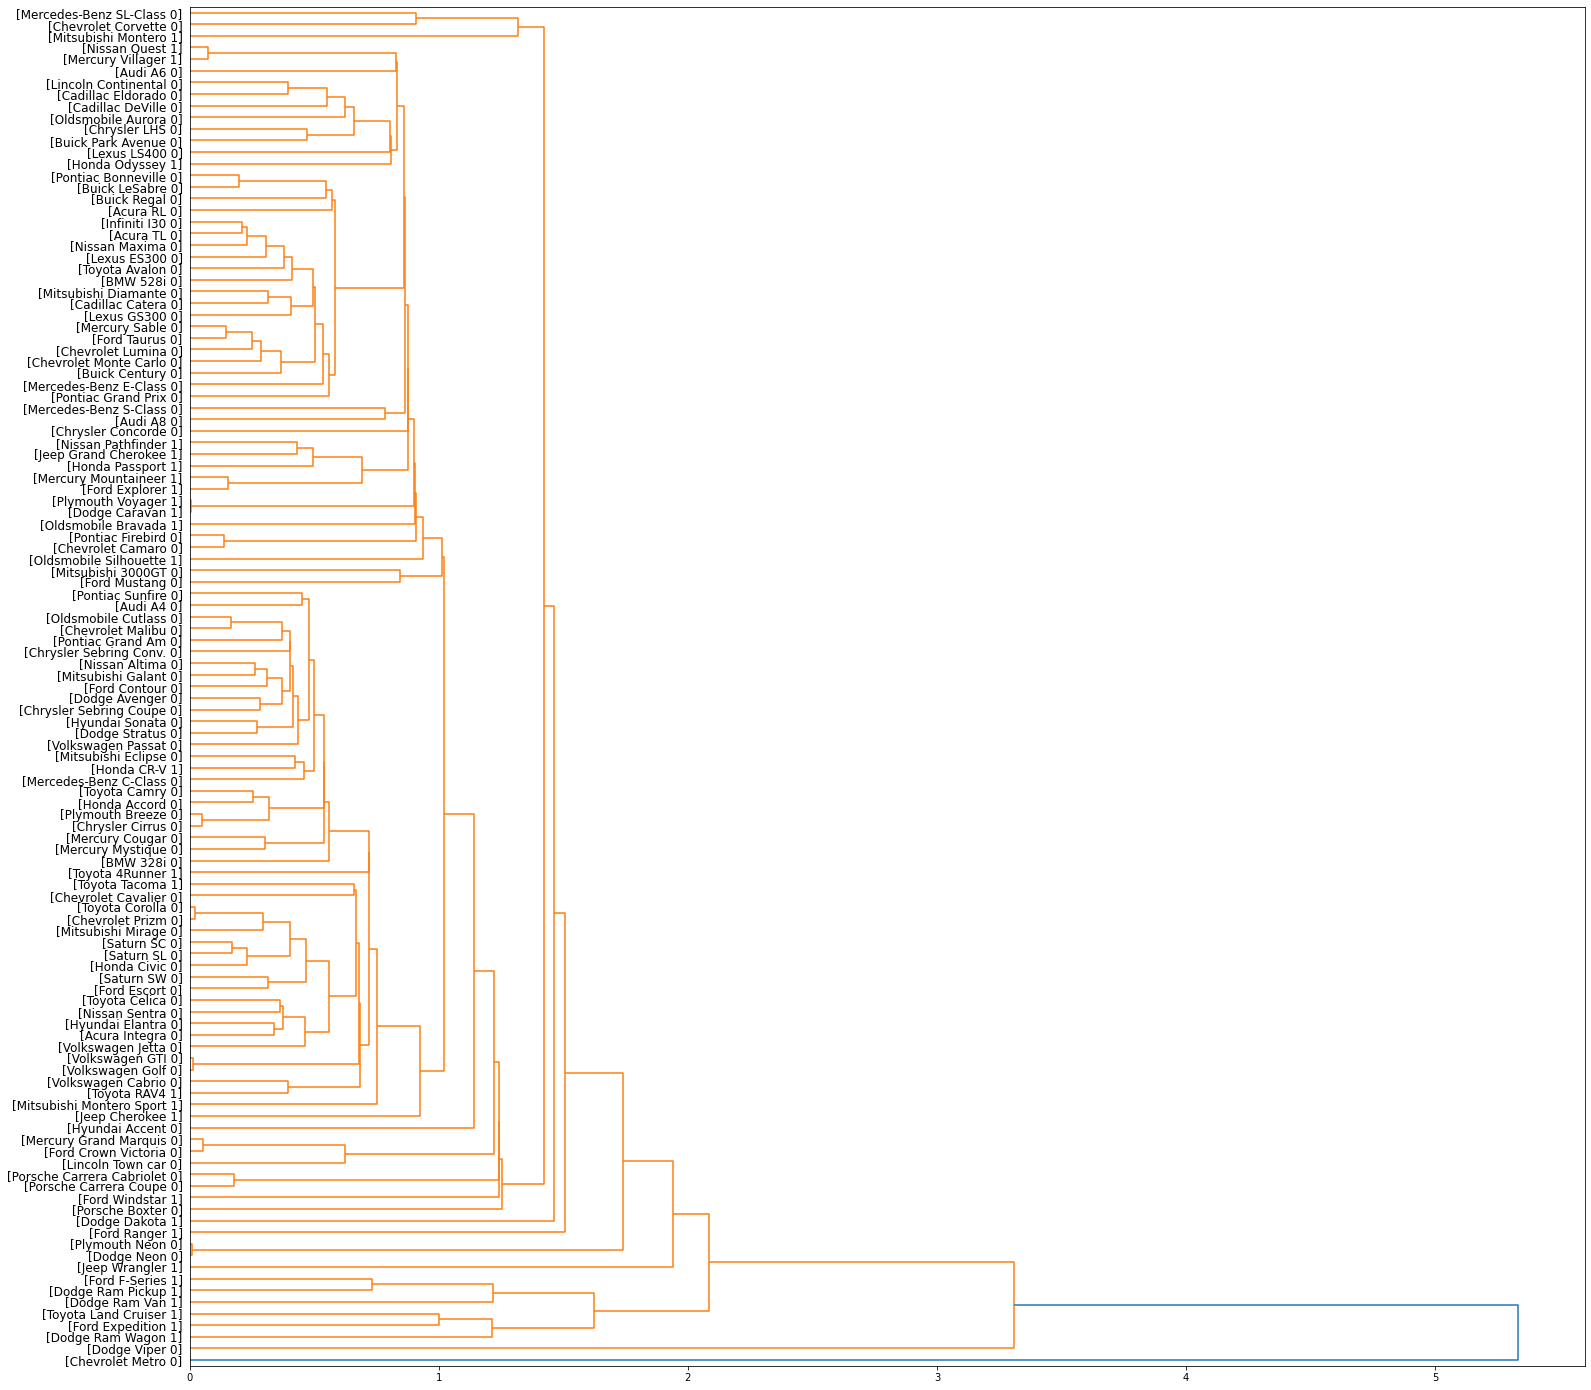

In [20]:
# Plot the dendogram
fig = plt.figure(figsize=(25,25))
def llf(id):
    return '[%s %s %s]' % (df['manufact'][id], df['model'][id], int(float(df['type'][id])) )

dendro = hierarchy.dendrogram(cars_single,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

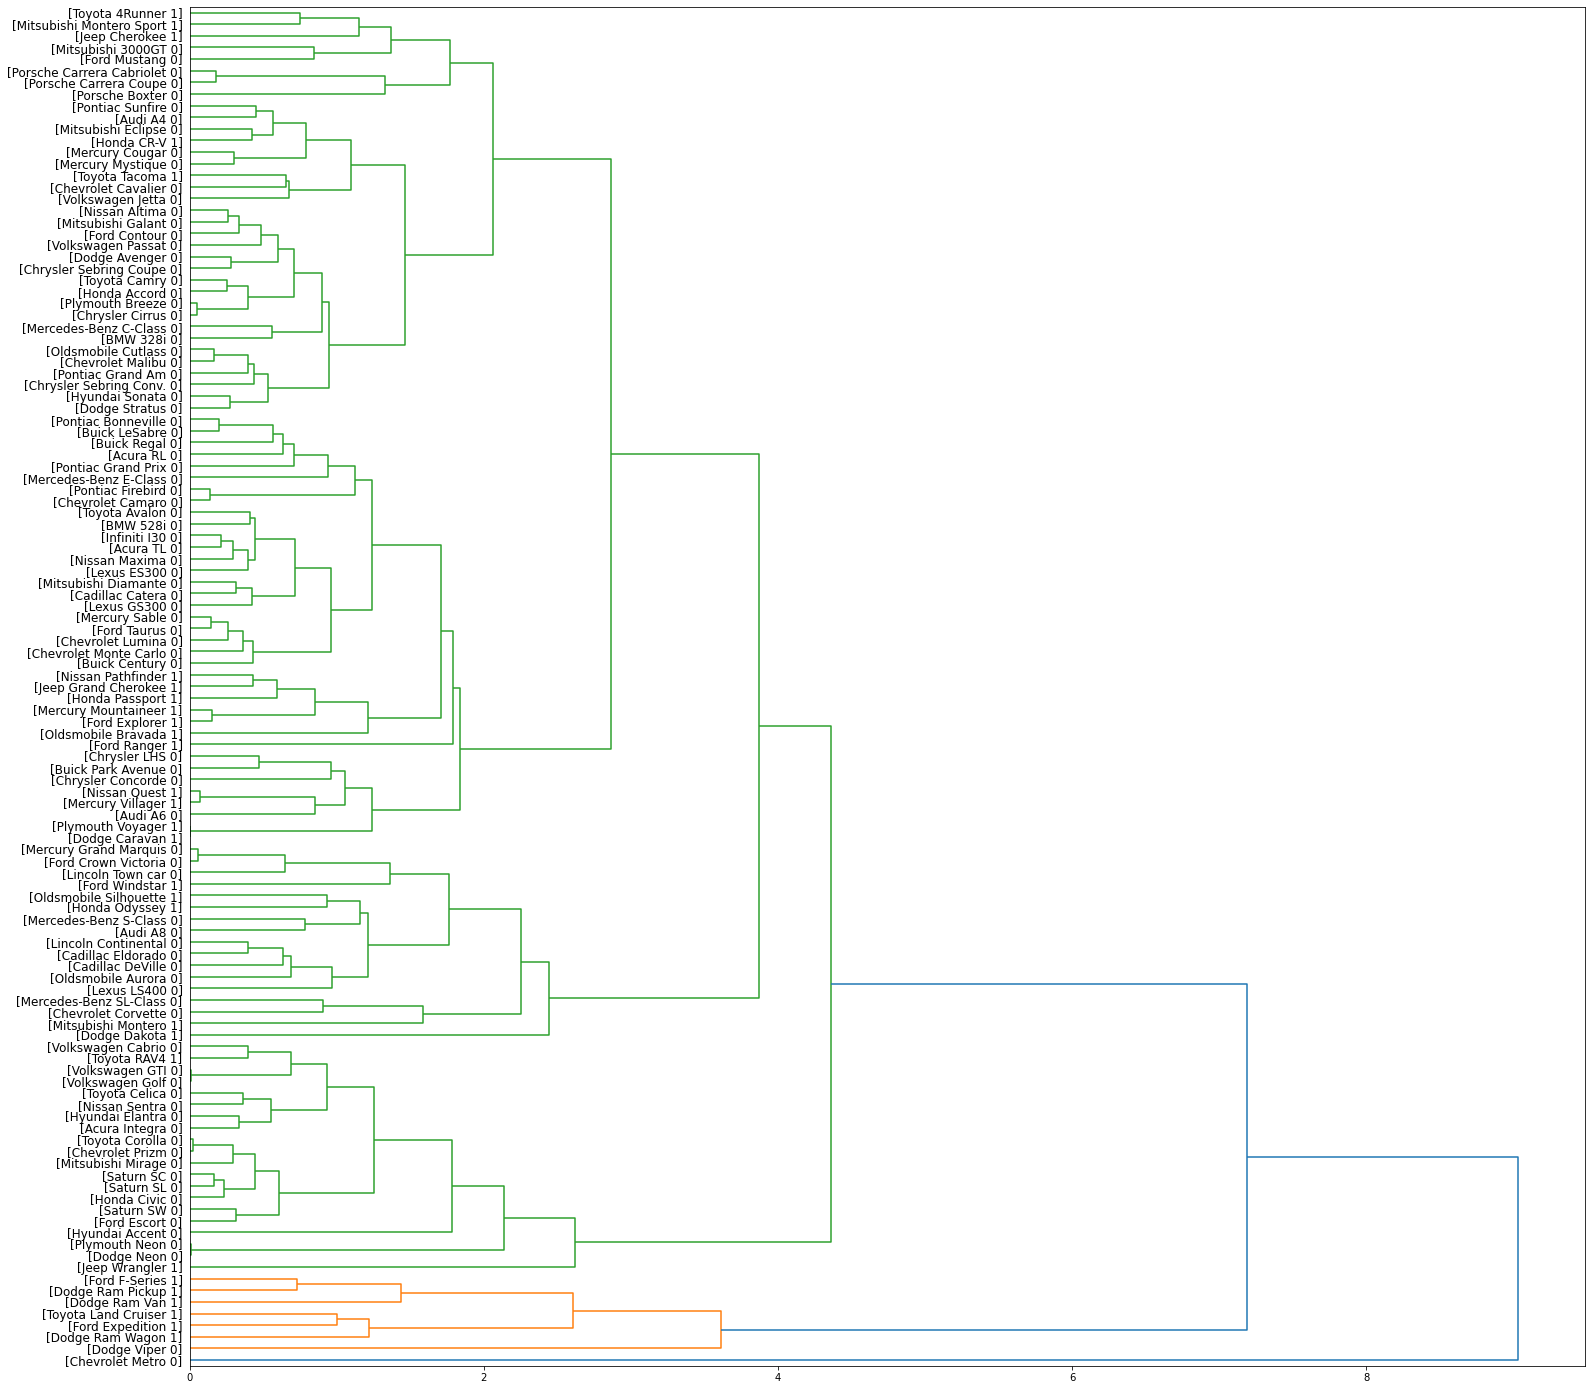

In [21]:
# Plot the dendogram
fig = plt.figure(figsize=(25,25))
def llf(id):
    return '[%s %s %s]' % (df['manufact'][id], df['model'][id], int(float(df['type'][id])) )

dendro = hierarchy.dendrogram(cars_average,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

Perbedaan menggunakan metode single linkage dan average linkage terlihat pada bagaimana cara data mengelompok dalam sebuah kluster. Ketika menggunakan single linkage, data menumpuk pada cluster 1. Sedangkan ketika menggunakan average linkage, data cenderung lebih menyebar.

### Agglomerative Clustering with scikit-learn

In [22]:
# Get matrix distance
dist_matrix = distance_matrix(feature_mtx,feature_mtx)
print(dist_matrix)

[[0.         0.57777143 0.75455727 ... 0.28530295 0.24917241 0.18879995]
 [0.57777143 0.         0.22798938 ... 0.36087756 0.66346677 0.62201282]
 [0.75455727 0.22798938 0.         ... 0.51727787 0.81786095 0.77930119]
 ...
 [0.28530295 0.36087756 0.51727787 ... 0.         0.41797928 0.35720492]
 [0.24917241 0.66346677 0.81786095 ... 0.41797928 0.         0.15212198]
 [0.18879995 0.62201282 0.77930119 ... 0.35720492 0.15212198 0.        ]]


In [23]:
# Hierarchical Clustering
single_agg = AgglomerativeClustering(n_clusters = 6, linkage = 'single').fit(feature_mtx)
avg_agg = AgglomerativeClustering(n_clusters = 6, linkage = 'average').fit(feature_mtx)

In [24]:
single_agg.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       3, 0, 0, 0, 0, 0, 0, 0, 0, 5, 1, 4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0], dtype=int64)

In [25]:
avg_agg.labels_

array([0, 4, 4, 0, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 4, 4, 4, 1, 0,
       3, 0, 0, 4, 0, 4, 0, 0, 0, 1, 5, 2, 2, 4, 4, 0, 4, 0, 4, 4, 4, 4,
       2, 4, 5, 0, 0, 0, 4, 4, 0, 0, 0, 4, 0, 0, 4, 4, 4, 4, 4, 4, 0, 0,
       0, 4, 0, 4, 0, 0, 0, 4, 4, 4, 4, 0, 4, 4, 1, 0, 0, 4, 4, 4, 0, 4,
       4, 4, 0, 0, 4, 0, 0, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0], dtype=int64)

In [26]:
# Copy the dataframe
single_df = df.copy(deep=True)
avg_df = df.copy(deep=True)

In [27]:
# Add the new class to the dataframe
single_df['cluster_'] = single_agg.labels_
avg_df['cluster_'] = avg_agg.labels_

In [28]:
single_df.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition,cluster_
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0,0
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0,0
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0,0
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0,0
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0,0


In [29]:
avg_df.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition,cluster_
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0,0
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0,4
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0,4
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0,0
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0,4


In [30]:
single_df.groupby(['cluster_', 'type'])['cluster_'].count()

cluster_  type
0         0.0     86
          1.0     23
1         1.0      2
2         1.0      3
3         0.0      1
4         1.0      1
5         0.0      1
Name: cluster_, dtype: int64

In [31]:
avg_df.groupby(['cluster_', 'type'])['cluster_'].count()

cluster_  type
0         0.0     47
          1.0      7
1         0.0      3
2         1.0      4
3         0.0      1
4         0.0     37
          1.0     16
5         1.0      2
Name: cluster_, dtype: int64

In [32]:
single_df.groupby(['cluster_', 'type'])['horsepow','engine_s','mpg','price'].mean()

C:\Users\FAHREL\AppData\Local\Temp/ipykernel_22516/2504798449.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  single_df.groupby(['cluster_', 'type'])['horsepow','engine_s','mpg','price'].mean()


horsepow  engine_s        mpg      price
cluster_ type                                            
0        0.0   181.197674  2.902326  25.358140  26.286779
         1.0   167.478261  3.095652  21.000000  22.811261
1        1.0   225.000000  4.900000  17.500000  23.197500
2        1.0   215.000000  4.400000  15.666667  35.479333
3        0.0    55.000000  1.000000  45.000000   9.235000
4        1.0   175.000000  3.900000  15.000000  21.315000
5        0.0   450.000000  8.000000  16.000000  69.725000

In [33]:
avg_df.groupby(['cluster_', 'type'])['horsepow','engine_s','mpg','price'].mean()

C:\Users\FAHREL\AppData\Local\Temp/ipykernel_22516/56725701.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  avg_df.groupby(['cluster_', 'type'])['horsepow','engine_s','mpg','price'].mean()


horsepow  engine_s        mpg      price
cluster_ type                                            
0        0.0   146.531915  2.246809  27.021277  20.306128
         1.0   149.714286  2.657143  22.000000  18.551571
1        0.0   365.666667  6.233333  19.333333  66.010000
2        1.0   205.000000  4.275000  15.500000  31.938250
3        0.0    55.000000  1.000000  45.000000   9.235000
4        0.0   217.540541  3.602703  23.481081  31.837027
         1.0   175.250000  3.287500  20.562500  24.674875
5        1.0   225.000000  4.900000  17.500000  23.197500

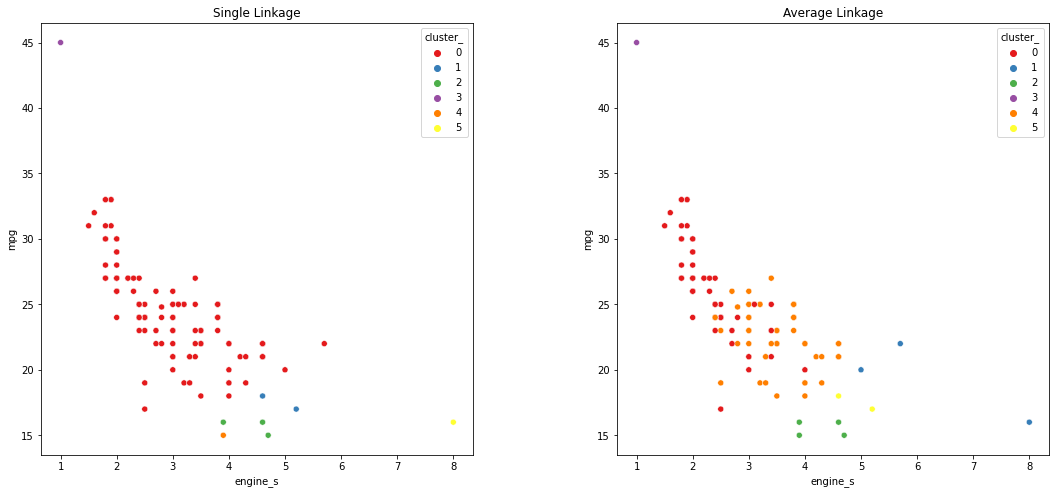

In [34]:
# Import sns
import seaborn as sns

# Plot single_df and avg_df side-by-side
fig = plt.figure(figsize=(20,10))

# Single Linkage
# Give title and show the dendogram
ax1 = fig.add_axes([0.1,0.1,0.3,0.6])
sns.scatterplot(x='engine_s', y='mpg', hue='cluster_', data=single_df, palette='Set1')
ax1.set_title('Single Linkage')

# Average Linkage
# Give title and show the dendogram
ax2 = fig.add_axes([0.5,0.1,0.3,0.6])
sns.scatterplot(x='engine_s', y='mpg', hue='cluster_', data=avg_df, palette='Set1')
ax2.set_title('Average Linkage')

plt.show()

### Summary

Seperti sebelumnya, perbedaan antara metode single dan average linkage terlihat pada banyaknya data yang mengumpul pada kluster tertentu. Dalam metode single linkage, data banyak berada di cluster 0 dengan jumlah hingga 86 + 23 data. Sedangkan pada metode average linkage, data lebih menyebar.

## Tugas 3 - Iris Dataset

### Import the data

In [35]:
# Import iris dataset
from sklearn.datasets import load_iris
iris = load_iris()


### Understanding and preprocessing the data

In [36]:
# Convert to df
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

In [37]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [38]:
# Normalize the dataset
x = df.values
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)
feature_mtx[0:5]

array([[0.22222222, 0.625     , 0.06779661, 0.04166667, 0.        ],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667, 0.        ],
       [0.11111111, 0.5       , 0.05084746, 0.04166667, 0.        ],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667, 0.        ],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667, 0.        ]])

### Agglomerative Clustering with scipy

In [39]:
# Agglomerative Clustering with scipy
import scipy
import scipy.cluster.hierarchy

leng = feature_mtx.shape[0]
D = scipy.zeros([leng,leng])
for i in range(leng):
    for j in range(leng):
        D[i,j] = scipy.spatial.distance.euclidean(feature_mtx[i], feature_mtx[j])

# Single Linkage
Z_single = hierarchy.linkage(D, 'single')

# Average Linkage
Z_avg = hierarchy.linkage(D, 'average')

# Compelte Linkage
Z_complete = hierarchy.linkage(D, 'complete')

C:\Users\FAHREL\AppData\Local\Temp/ipykernel_22516/2542127099.py:6: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  D = scipy.zeros([leng,leng])
C:\Users\FAHREL\AppData\Local\Temp/ipykernel_22516/2542127099.py:12: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z_single = hierarchy.linkage(D, 'single')
C:\Users\FAHREL\AppData\Local\Temp/ipykernel_22516/2542127099.py:15: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z_avg = hierarchy.linkage(D, 'average')
C:\Users\FAHREL\AppData\Local\Temp/ipykernel_22516/2542127099.py:18: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z_complete = hierarchy.linkage(D, 'complete')


In [40]:
# Plot the dendogram
def llf(id):
    return '[%s]' % ( iris.target_names[df['target'][id]] )

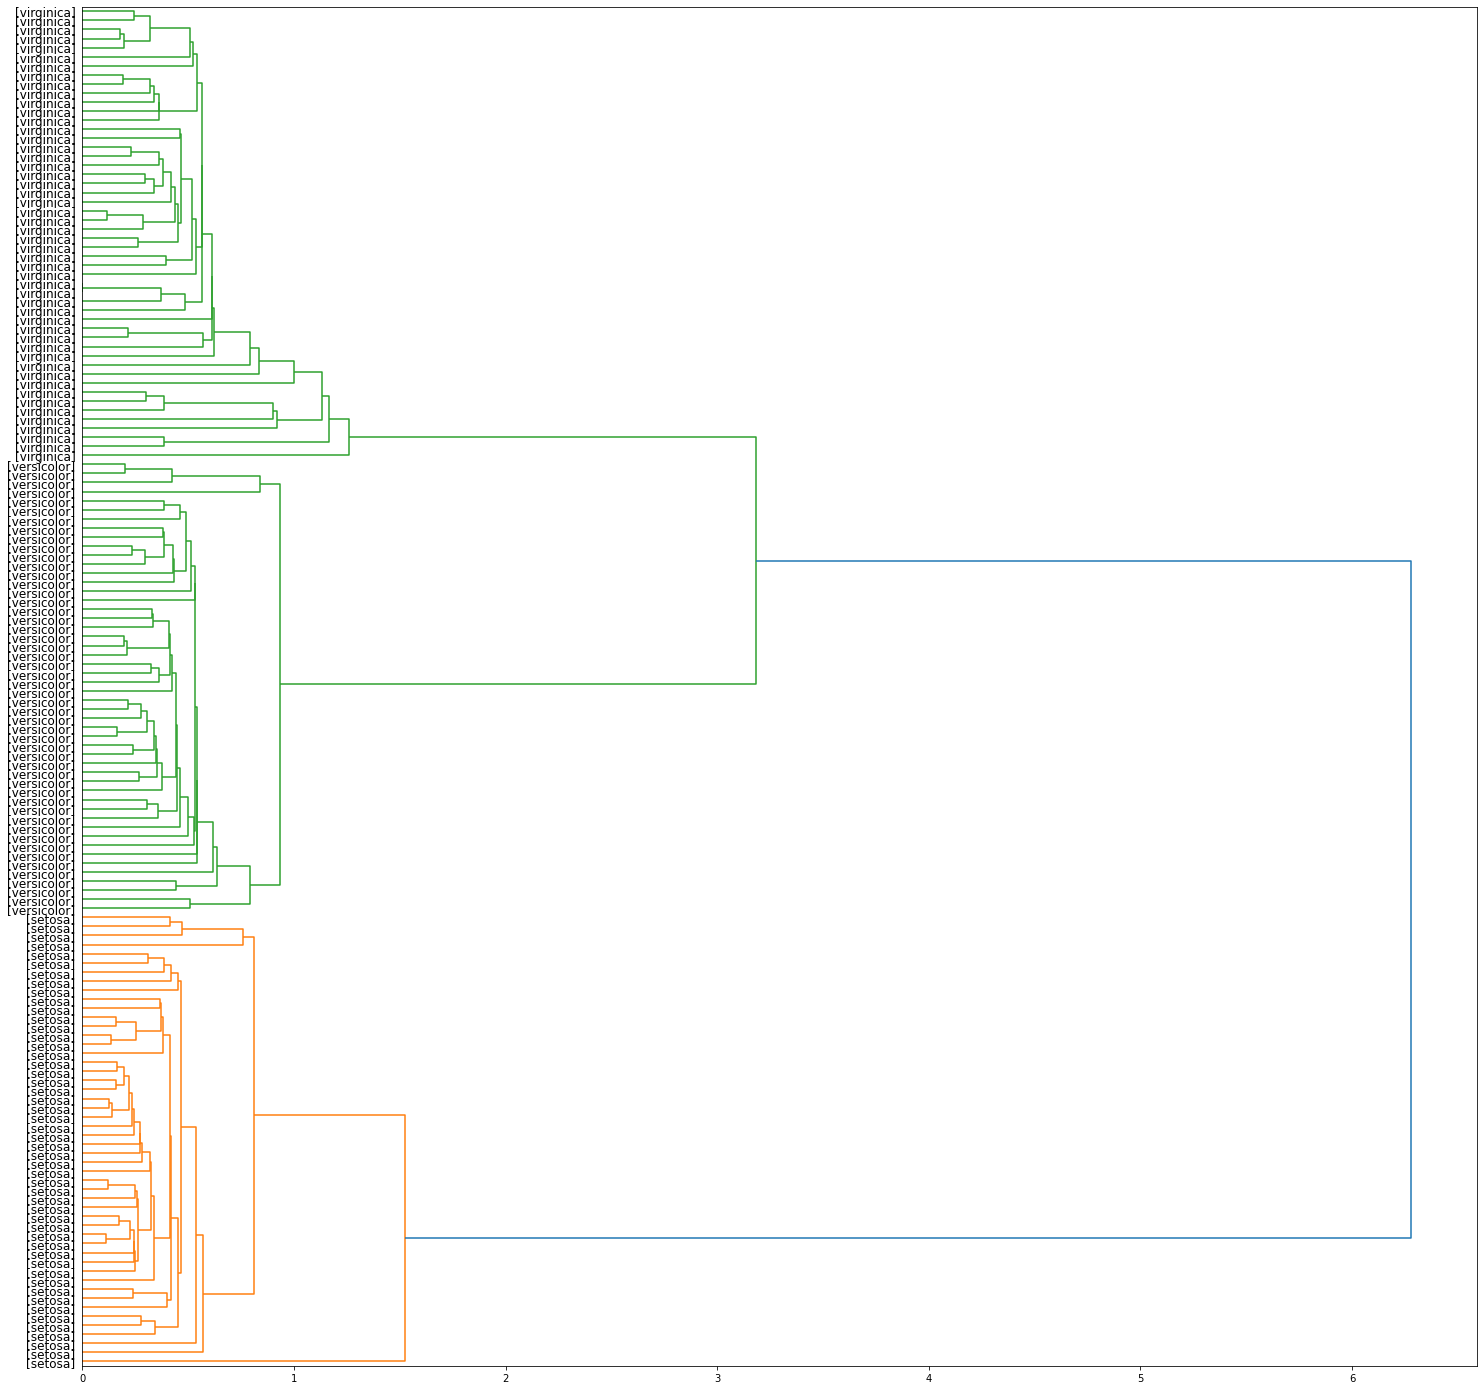

In [41]:
fig = plt.figure(figsize=(25,25))
dendro = hierarchy.dendrogram(Z_single,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

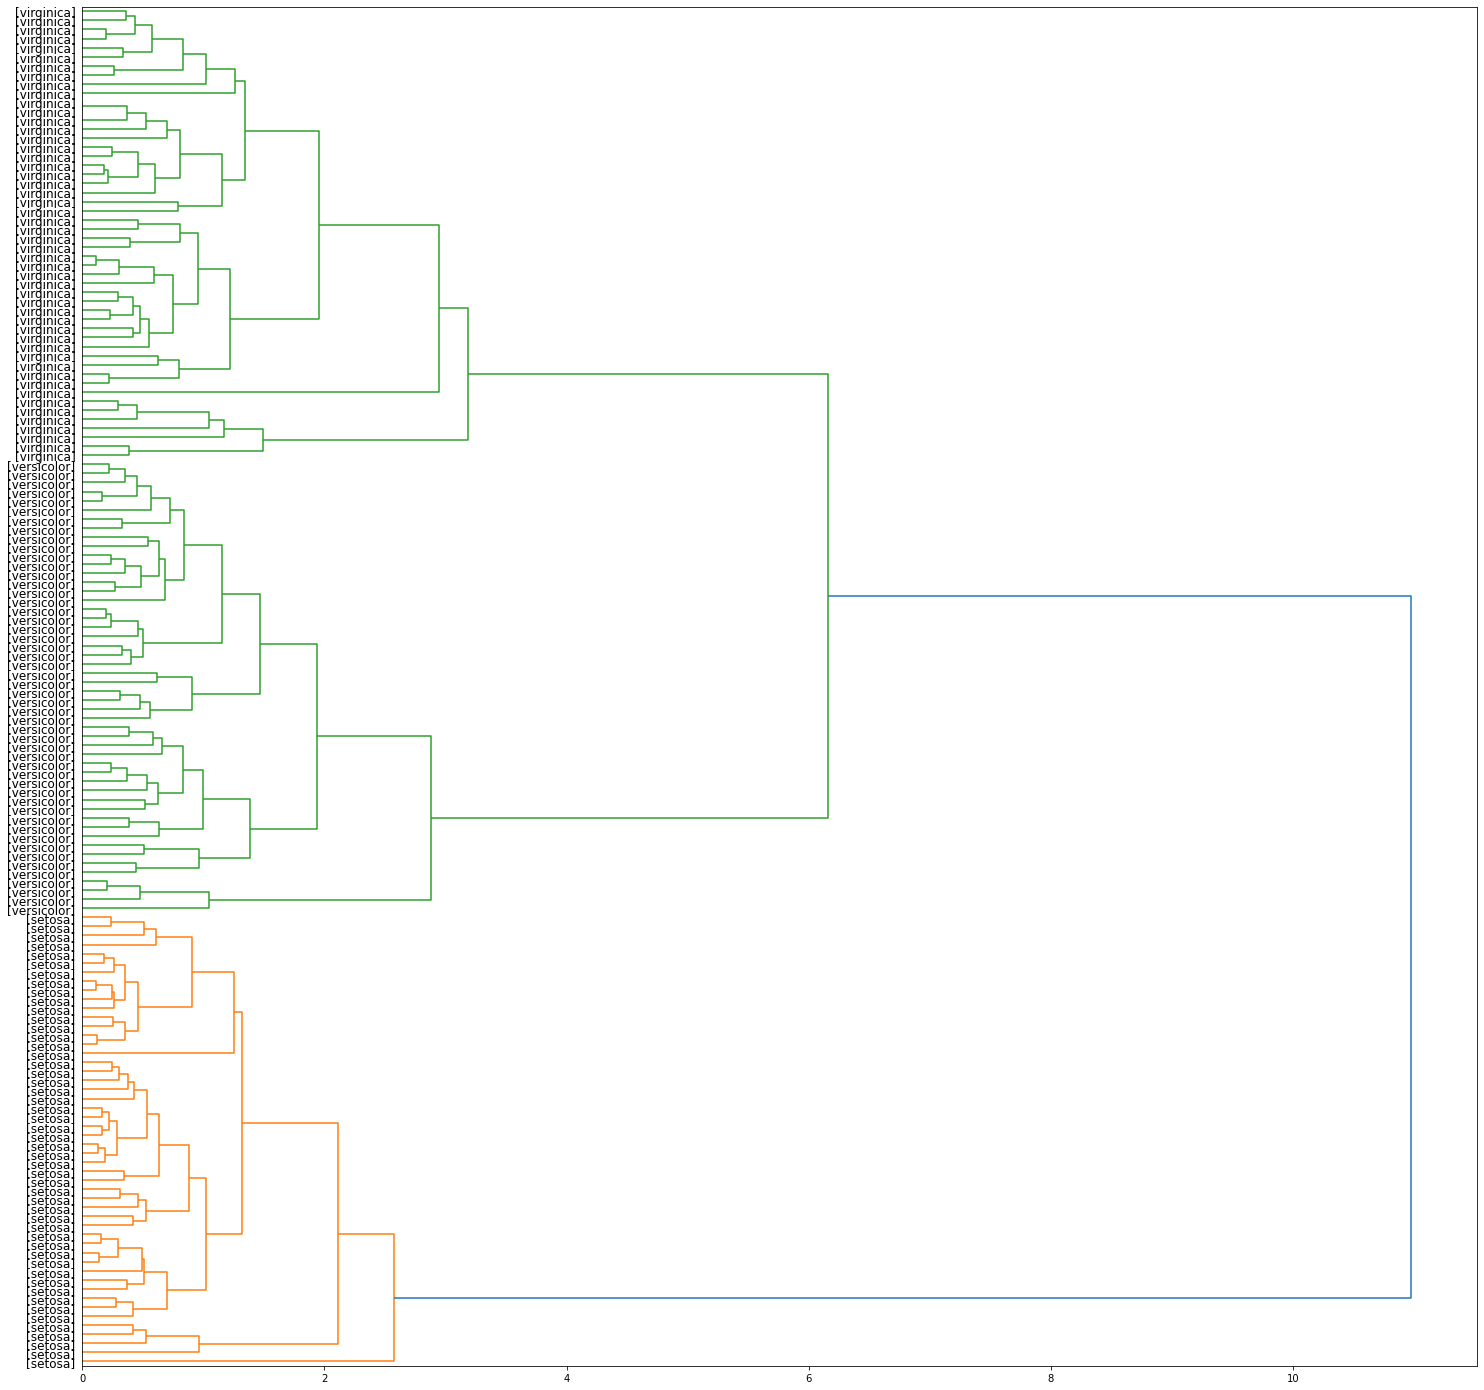

In [42]:
fig = plt.figure(figsize=(25,25))
dendro = hierarchy.dendrogram(Z_avg,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

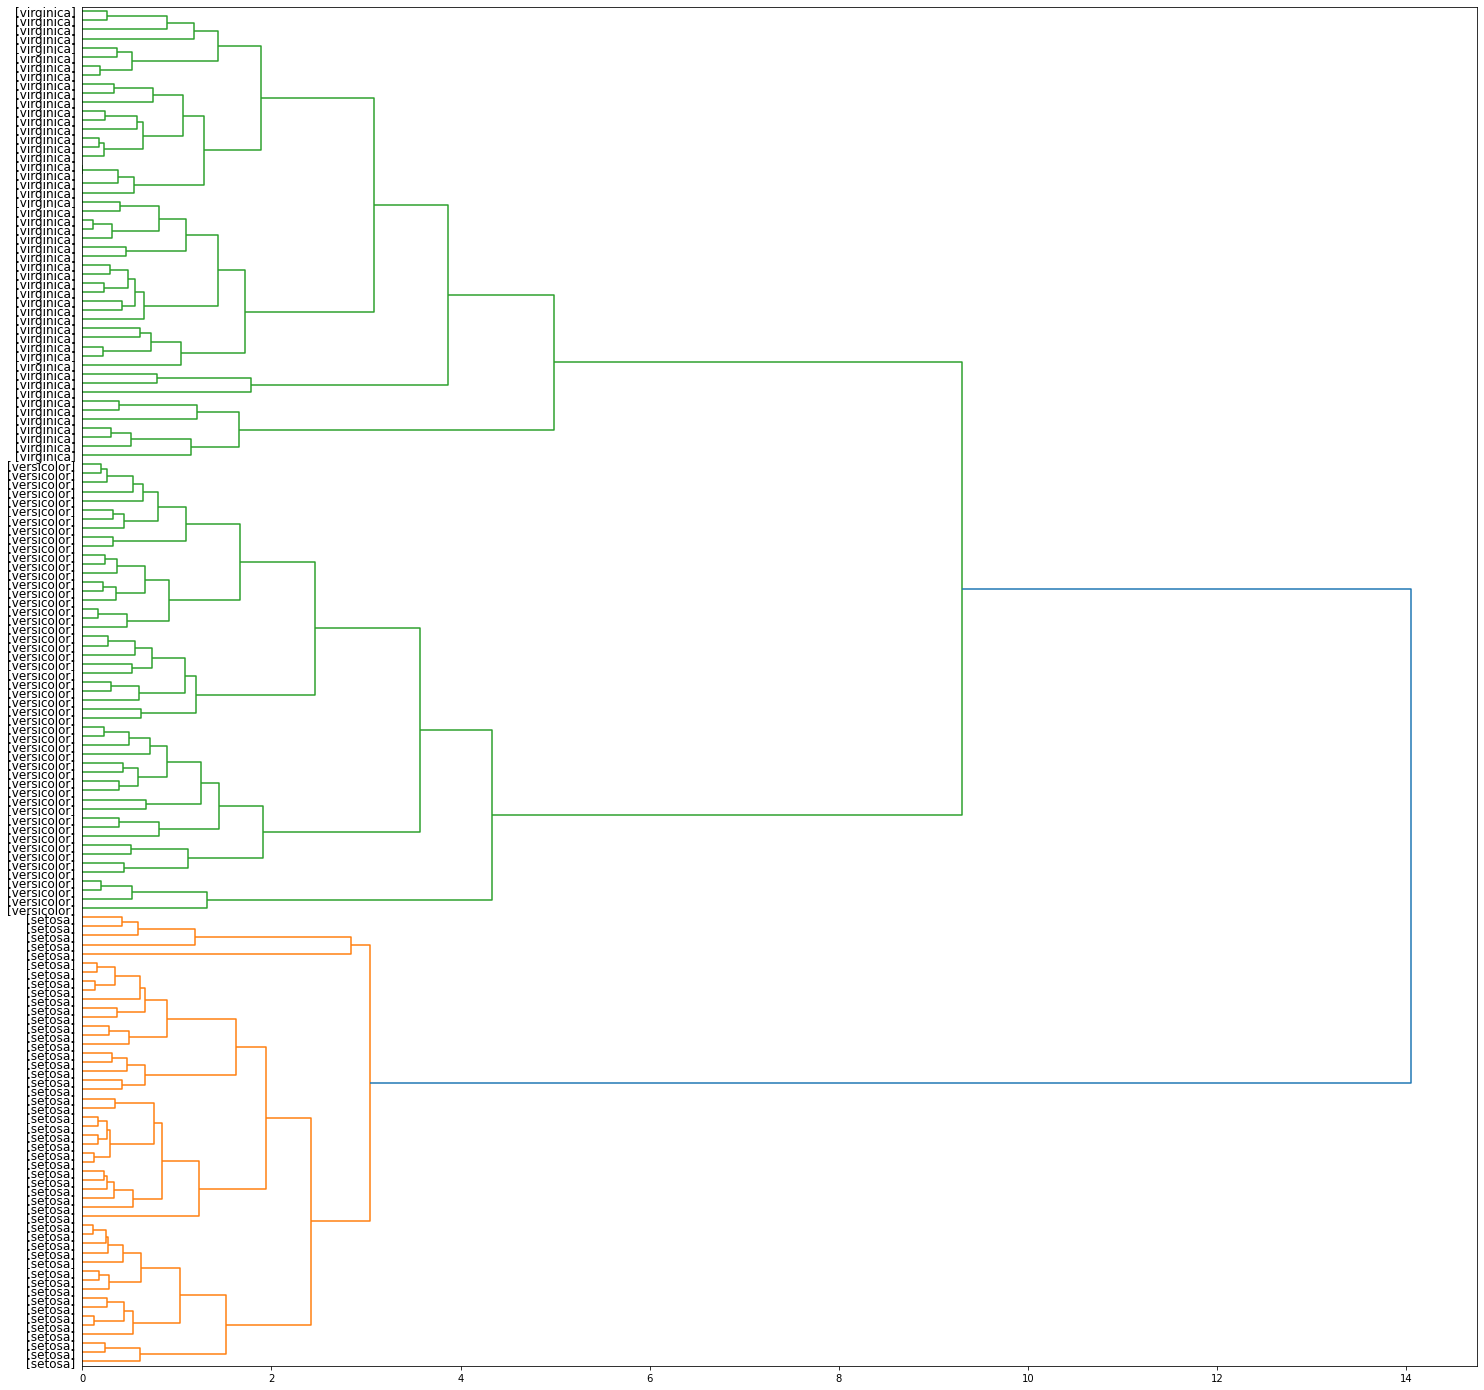

In [43]:
fig = plt.figure(figsize=(25,25))
dendro = hierarchy.dendrogram(Z_complete,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

### Agglomerative Clustering with sklearn

In [44]:
# Agglomerative Clustering with sklearn
from sklearn.cluster import AgglomerativeClustering

# Single Linkage
single_agglo_clust = AgglomerativeClustering(n_clusters = 3, linkage = 'single')
single_agglo_clust.fit(feature_mtx)

# Average Linkage
avg_agglo_clust = AgglomerativeClustering(n_clusters = 3, linkage = 'average')
avg_agglo_clust.fit(feature_mtx)

# Complete Linkage
complete_agglo_clust = AgglomerativeClustering(n_clusters = 3, linkage = 'complete')
complete_agglo_clust.fit(feature_mtx)

print("Single Linkage")
print(single_agglo_clust.labels_)
print("="*75)
print("Average Linkage")
print(avg_agglo_clust.labels_)
print("="*75)
print("Complete Linkage")
print(complete_agglo_clust.labels_)

Single Linkage
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
Average Linkage
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
Complete Linkage
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 2 1 2 1 2 2
 1 2 1 1 2 1 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 1 2 2 1 1 2 2 2 1 2 2 2 1 2
 2 1]


In [45]:
# Copy the dataframe
single_df = df.copy(deep=True)
avg_df = df.copy(deep=True)
complete_df = df.copy(deep=True)

# Add the new class to the dataframe
single_df['cluster_'] = single_agglo_clust.labels_
avg_df['cluster_'] = avg_agglo_clust.labels_
complete_df['cluster_'] = complete_agglo_clust.labels_

In [46]:
single_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,cluster_
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1


In [47]:
avg_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,cluster_
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1


In [48]:
complete_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,cluster_
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0


In [57]:
single_df.groupby(['cluster_', 'target'])['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)'].mean()

C:\Users\FAHREL\AppData\Local\Temp/ipykernel_22516/4196009701.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  single_df.groupby(['cluster_', 'target'])['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)'].mean()


,,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
cluster_,target,,,,
0,2,6.588,2.974,5.552,2.026
1,0,5.006,3.428,1.462,0.246
2,1,5.936,2.770,4.260,1.326


In [67]:
single_df.groupby(['cluster_', 'target'])['cluster_'].count()

cluster_  target
0         2         50
1         0         50
2         1         50
Name: cluster_, dtype: int64

In [65]:
avg_df.groupby(['cluster_', 'target'])['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)'].mean()

C:\Users\FAHREL\AppData\Local\Temp/ipykernel_22516/2080208213.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  avg_df.groupby(['cluster_', 'target'])['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)'].mean()


,,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
cluster_,target,,,,
0,2,6.588,2.974,5.552,2.026
1,0,5.006,3.428,1.462,0.246
2,1,5.936,2.770,4.260,1.326


In [68]:
avg_df.groupby(['cluster_', 'target'])['cluster_'].count()

cluster_  target
0         2         50
1         0         50
2         1         50
Name: cluster_, dtype: int64

In [59]:
complete_df.groupby(['cluster_', 'target'])['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)'].mean()

C:\Users\FAHREL\AppData\Local\Temp/ipykernel_22516/1147583104.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  complete_df.groupby(['cluster_', 'target'])['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)'].mean()


sepal length (cm)  sepal width (cm)  petal length (cm)  \
cluster_ target                                                           
0        0                5.006000             3.428           1.462000   
1        1                5.936000             2.770           4.260000   
         2                6.055000             2.740           5.130000   
2        2                6.943333             3.130           5.833333   

                 petal width (cm)  
cluster_ target                    
0        0               0.246000  
1        1               1.326000  
         2               1.815000  
2        2               2.166667

In [69]:
complete_df.groupby(['cluster_', 'target'])['cluster_'].count()

cluster_  target
0         0         50
1         1         50
          2         20
2         2         30
Name: cluster_, dtype: int64

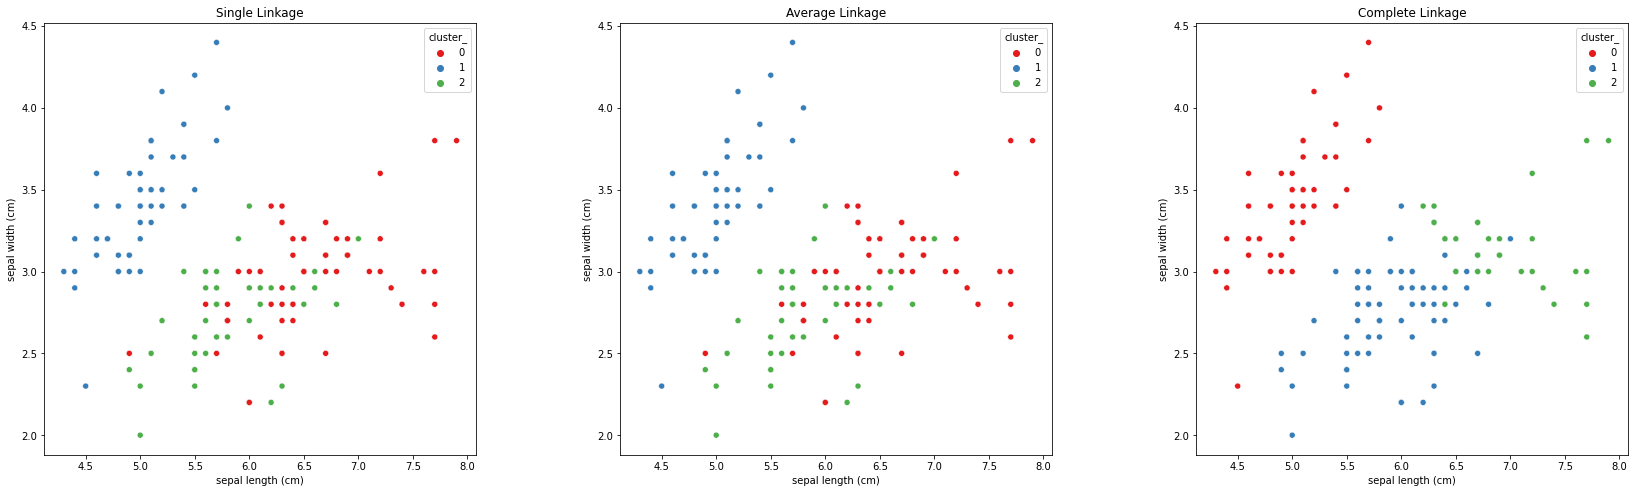

In [62]:
# Plot cluster
fig = plt.figure(figsize=(20,10))

# Compare Single, Average, and Complete Linkage
# Single Linkage
# Give title and show the dendogram
ax1 = fig.add_axes([0.1,0.1,0.3,0.6])
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', hue='cluster_', data=single_df, palette='Set1')
ax1.set_title('Single Linkage')

# Average Linkage
# Give title and show the dendogram
ax2 = fig.add_axes([0.5,0.1,0.3,0.6])
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', hue='cluster_', data=avg_df, palette='Set1')
ax2.set_title('Average Linkage')

# Complete Linkage
# Give title and show the dendogram
ax3 = fig.add_axes([0.9,0.1,0.3,0.6])
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', hue='cluster_', data=complete_df, palette='Set1')
ax3.set_title('Complete Linkage')

plt.show()

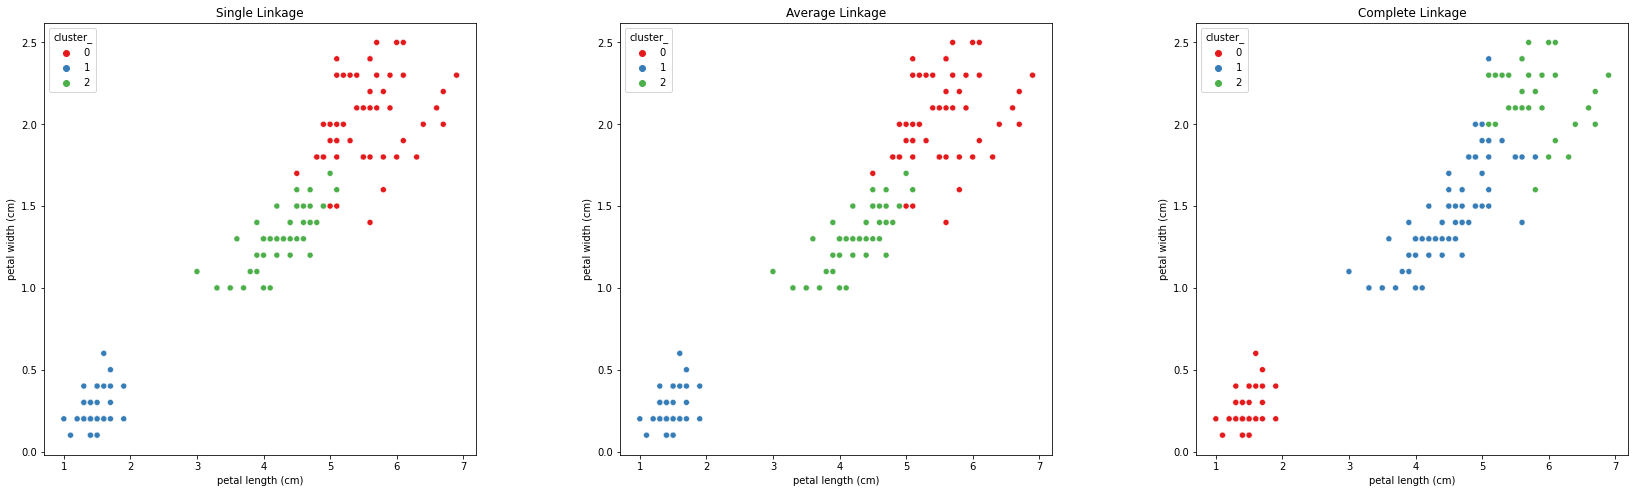

In [63]:
# Plot cluster
fig = plt.figure(figsize=(20,10))

# Compare Single, Average, and Complete Linkage
# Single Linkage
# Give title and show the dendogram
ax1 = fig.add_axes([0.1,0.1,0.3,0.6])
sns.scatterplot(x='petal length (cm)', y='petal width (cm)', hue='cluster_', data=single_df, palette='Set1')
ax1.set_title('Single Linkage')

# Average Linkage
# Give title and show the dendogram
ax2 = fig.add_axes([0.5,0.1,0.3,0.6])
sns.scatterplot(x='petal length (cm)', y='petal width (cm)', hue='cluster_', data=avg_df, palette='Set1')
ax2.set_title('Average Linkage')

# Complete Linkage
# Give title and show the dendogram
ax3 = fig.add_axes([0.9,0.1,0.3,0.6])
sns.scatterplot(x='petal length (cm)', y='petal width (cm)', hue='cluster_', data=complete_df, palette='Set1')
ax3.set_title('Complete Linkage')

plt.show()

### Summary

Di dalam metode Single Linkage dan Average Linkage tidak terdapat perbedaan hasil clustering. Perbedaan terlihat ketika menggunakan metode Complete Linkage. Terlihat pada Complete Linkage jumlah cluster 1 ada 70 dan cluster 2 ada 30. Sedangkan pada Single Linkage dan Average Linkage jumlah cluster 1 ada 50 dan cluster 2 ada 50.